In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import random
import wfdb as wf
import pywt

import time

import model
import prep

### The code takes a few seconds to run.

In [3]:
start_main = time.clock()
train, test = prep.main(feature_nbeats = 5, lead_nbeats = 2, forecast_nbeats = 3)
end_main = time.clock()
print('prep time: '+str((end_main - start_main))+' sec')

prep time: 5.5852390000000005 sec


### I tried to test for edge case values of window sizes:

In [5]:
train, test = prep.main(feature_nbeats = 1, lead_nbeats = 0, forecast_nbeats = 1)
train, test = prep.main(feature_nbeats = 50, lead_nbeats = 0, forecast_nbeats = 1)
train, test = prep.main(feature_nbeats = 1, lead_nbeats = 10, forecast_nbeats = 1)
train, test = prep.main(feature_nbeats = 5, lead_nbeats = 3, forecast_nbeats = 10)

### Note that the minimum size for the windows is 1 for the feature and forecast, 0 for the lead. They have to be integers. This is enforced via assert.

In [5]:
train, test = prep.main(feature_nbeats = 0, lead_nbeats = 0, forecast_nbeats = 1)
#train, test = prep.main(feature_nbeats = 1, lead_nbeats = 0, forecast_nbeats = 0)
#train, test = prep.main(feature_nbeats = 1, lead_nbeats = -1, forecast_nbeats = 1)
#train, test = prep.main(feature_nbeats = 1, lead_nbeats = 1, forecast_nbeats = 1.2)

AssertionError: invalid window size

### So let's see what the output is.

In [3]:
feat, lead, fore = 10, 2, 5

train, test = prep.main(feature_nbeats = feat, lead_nbeats = lead, forecast_nbeats = fore)

In [11]:
print( "%s training records and %s testing records" % (len(train), len(test)) )
print( "(%s records thrown out because they had no bad beats)" % (48 - len(train) - len(test)) )
print( "for testing fraction of %s" % (len(test)/len(train)) )

37 training records and 9 testing records
(2 records thrown out because they had no bad beats)
for testing fraction of 0.24324324324324326


### Plotting some feature_windows, we see that there are the correct number of beats.
### We also see that the feature_windows with corresponding label arrhythmia look noisier than the normal ones, even with the leadtime and window sizes! That's good.

In [4]:
rcParams['mathtext.default']='regular'
plt.rc('font', family='monospace', )
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

In [5]:
from scipy.signal import medfilt
import random

In [10]:
good_windows, bad_windows = [], []
for tr in train[1:2]: # look at a particular record for cleaner plot
    for wp in tr.wps:
        if wp.beat_label == 'normal':
            good_windows.append(wp)
        else:
            bad_windows.append(wp)

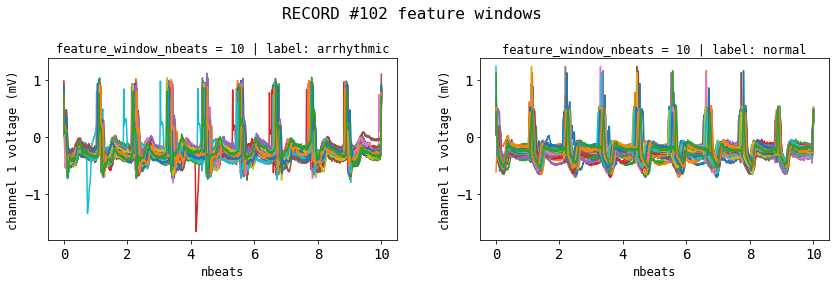

In [7]:
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
for wp in bad_windows:
    signal = wp.signal[:,0]
    nbeats = np.linspace(0,feat,len(signal))
    plt.plot(nbeats,signal)
    plt.ylabel('channel 1 voltage (mV)',fontsize=12)
    plt.xlabel('nbeats',fontsize=12)
plt.title('feature_window_nbeats = ' +  str(feat) + ' | label: arrhythmic',fontsize=12)

ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
for wp in good_windows:
    signal = wp.signal[:,0]
    nbeats = np.linspace(0,feat,len(signal))
    plt.plot(nbeats,signal)
    plt.ylabel('channel 1 voltage (mV)',fontsize=12)
    plt.xlabel('nbeats',fontsize=12)
plt.title('feature_window_nbeats = ' +  str(feat) + ' | label: normal',fontsize=12)

plt.suptitle('RECORD #' + train[1].name + ' feature windows', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

### I tried adding baseline removal to the main prep code, but it makes the code slower (~4 min as opposed to ~5 sec). Need to figure out a solution to this. In the meantime, here is what baseline correct results would look like:

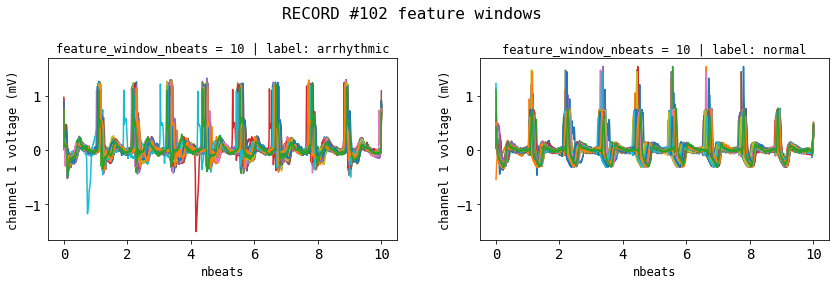

In [11]:
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
for wp in bad_windows:
    signal = wp.signal[:,0]
    baseline = medfilt(signal, 72+1)
    baseline = medfilt(baseline, 216+1)
    signal = signal - baseline
    nbeats = np.linspace(0,feat,len(signal))
    plt.plot(nbeats,signal)
    plt.ylabel('channel 1 voltage (mV)',fontsize=12)
    plt.xlabel('nbeats',fontsize=12)
plt.title('feature_window_nbeats = ' +  str(feat) + ' | label: arrhythmic',fontsize=12)

ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
for wp in good_windows:
    signal = wp.signal[:,0]
    baseline = medfilt(signal, 72+1)
    baseline = medfilt(baseline, 216+1)
    signal = signal - baseline
    nbeats = np.linspace(0,feat,len(signal))
    plt.plot(nbeats,signal)
    plt.ylabel('channel 1 voltage (mV)',fontsize=12)
    plt.xlabel('nbeats',fontsize=12)
plt.title('feature_window_nbeats = ' +  str(feat) + ' | label: normal',fontsize=12)

plt.suptitle('RECORD #' + train[1].name + ' feature windows', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

### Now, just to demonstrate, I had the code output the forecast windows instead of the feature windows.

In [5]:
feat, lead, fore = 10, 2, 5

train, test = prep.main(feature_nbeats = feat, lead_nbeats = lead, forecast_nbeats = fore)

In [6]:
good_windows, bad_windows = [], []
for tr in train[1:2]:
    for wp in tr.wps:
        if wp.beat_label == 'normal':
            good_windows.append(wp)
        else:
            bad_windows.append(wp)

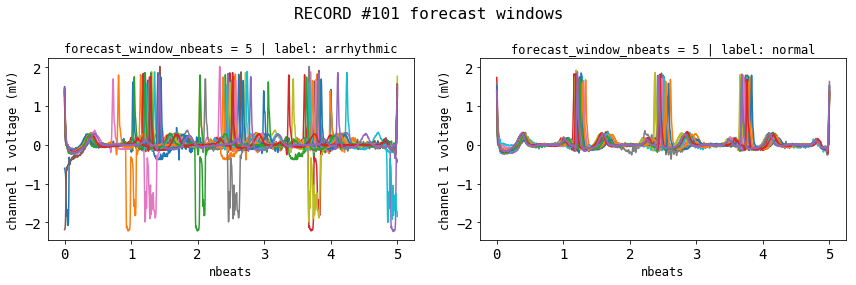

In [7]:
from scipy.signal import medfilt
import random

fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
for wp in bad_windows: #random.sample(bad_windows,100):
    signal = wp.signal[:,0]
    baseline = medfilt(signal, 72+1)
    baseline = medfilt(baseline, 216+1)
    signal = signal - baseline
    nbeats = np.linspace(0,fore,len(signal))
    plt.plot(nbeats,signal)
    plt.ylabel('channel 1 voltage (mV)',fontsize=12)
    plt.xlabel('nbeats',fontsize=12)
plt.title('forecast_window_nbeats = ' +  str(fore) + ' | label: arrhythmic',fontsize=12)

ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
for wp in good_windows: #random.sample(good_windows,100):
    signal = wp.signal[:,0]
    baseline = medfilt(signal, 72+1)
    baseline = medfilt(baseline, 216+1)
    signal = signal - baseline
    nbeats = np.linspace(0,fore,len(signal))
    plt.plot(nbeats,signal)
    plt.ylabel('channel 1 voltage (mV)',fontsize=12)
    plt.xlabel('nbeats',fontsize=12)
plt.title('forecast_window_nbeats = ' +  str(fore) + ' | label: normal',fontsize=12)

plt.suptitle('RECORD #' + train[1].name + ' forecast windows', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()